#Домашнее задание № 13

#Алгоритмы кластеризации



In [1]:
# установим библиотеку
!pip install opencv-python

In [2]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [3]:
# не хочет монтироваться)
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# попробуем по другому
!wget 'https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/Изображение_к_дз_по_Кластеризации_feml.jpg'

--2024-11-10 08:19:16--  https://u.netology.ru/backend/uploads/lms/content_assets/file/5502/%D0%98%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B4%D0%B7_%D0%BF%D0%BE_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_feml.jpg
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107959 (105K) [image/jpeg]
Saving to: ‘Изображение_к_дз_по_Кластеризации_feml.jpg’

Изображение_к_дз_по 100%[===================>] 105.43K   254KB/s    in 0.4s    

2024-11-10 08:19:17 (254 KB/s) - ‘Изображение_к_дз_по_Кластеризации_feml.jpg’ saved [107959/107959]



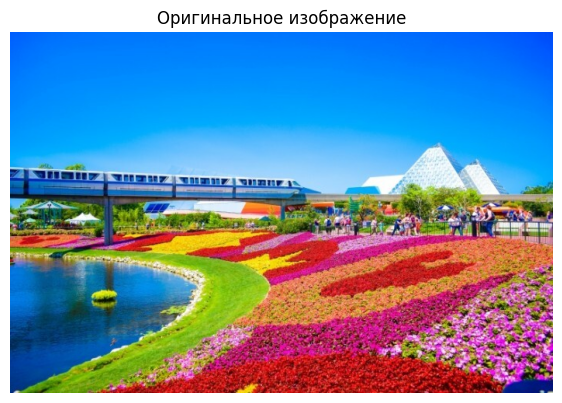

In [5]:
# посмотрим на нашу картинку
path = '/content/Изображение_к_дз_по_Кластеризации_feml.jpg'
img = cv2.imread(path)
draw_picture(img, 'Оригинальное изображение', bgr=True)

In [6]:
# посмотрим размер картинки
img.shape

(466, 700, 3)

Забегая вперед скажу, что бесплатной памяти тут катастрофически не хватает. Поэтому уменьшаю размер изображения в 2 раза

In [7]:
# зададим меньший размер
new_size = (img.shape[1]//2, img.shape[0]//2)
new_size

(350, 233)

In [8]:
# уменьшим размер
img = cv2.resize(img, dsize = new_size,
                  interpolation=cv2.INTER_CUBIC   # кубическая интерполяция
                 )

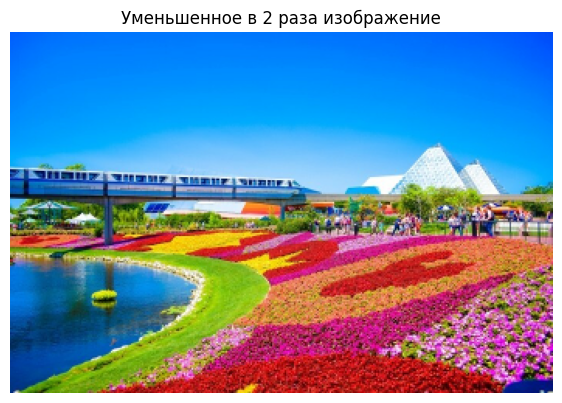

In [9]:
# посмотрим на нашу картинку
draw_picture(img, 'Уменьшенное в 2 раза изображение', bgr=True)

In [10]:
# проверим размер
img.shape

(233, 350, 3)

#2. Реализуем 3 модели кластеризации

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [11]:
# загрузим библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [253,  93,   0],
       [253,  93,   0],
       ...,
       [166, 182, 172],
       [174, 191, 183],
       [172, 191, 180]], dtype=uint8)

K=2

In [13]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [14]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [15]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
set(target)

{0, 1}

In [17]:
len(target)

81550

In [18]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[235.03377202, 145.38098554,  33.08123854],
       [ 73.90165596, 102.34634882, 163.626745  ]])

In [19]:
color_space[target]

array([[235.03377202, 145.38098554,  33.08123854],
       [235.03377202, 145.38098554,  33.08123854],
       [235.03377202, 145.38098554,  33.08123854],
       ...,
       [ 73.90165596, 102.34634882, 163.626745  ],
       [ 73.90165596, 102.34634882, 163.626745  ],
       [ 73.90165596, 102.34634882, 163.626745  ]])

In [20]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [21]:
# проверим размер
output_image.shape

(233, 350, 3)

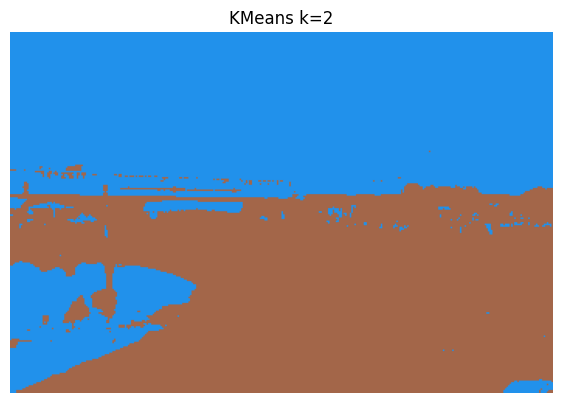

In [22]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

k=5

In [23]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=original_image, reshaped_img=reshaped_img, k=2):

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return

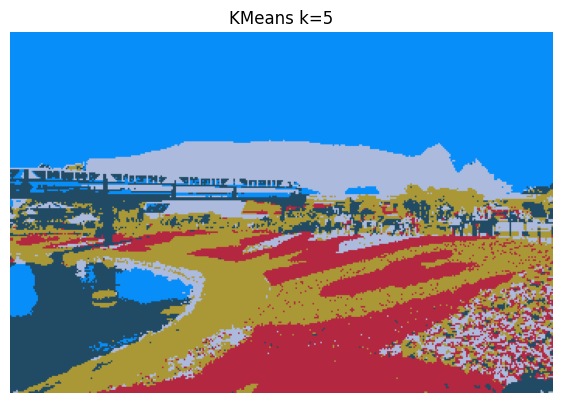

In [24]:
# посмотрим
KM_k(k=5)

k=10

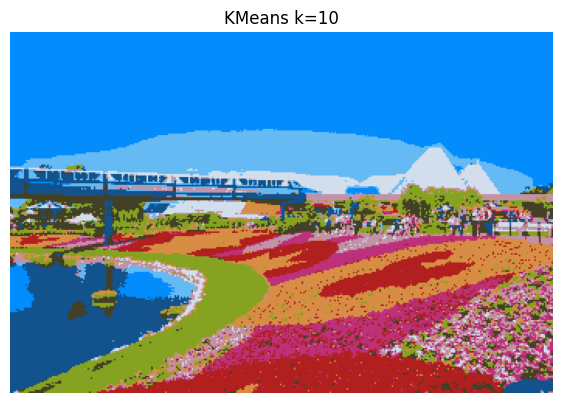

In [25]:
# посмотрим
KM_k(k=10)

k=20

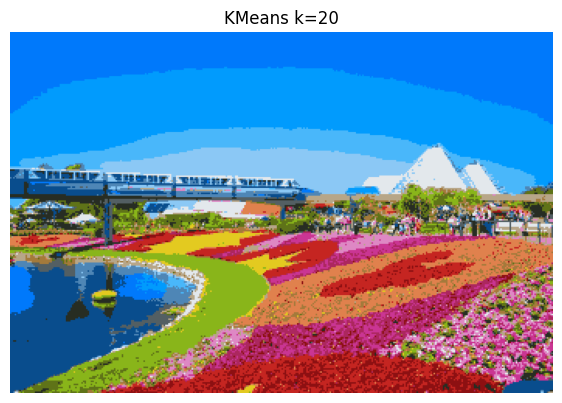

In [26]:
# посмотрим
KM_k(k=20)

b) DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
import cv2

In [368]:
# Создим объект DBSCAN
# dbscan = DBSCAN(eps=3, min_samples=15, metric='minkowski', p=1, n_jobs=-1)
eps=8
min_samples=25
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

In [369]:
# обучим модель
dbscan.fit(reshaped_img)
dbscan

DBSCAN(eps=8, min_samples=25)

In [370]:
# Получим предсказания
target = dbscan.fit_predict(reshaped_img)
target

array([ 0,  0,  0, ..., -1, -1, -1])

In [371]:
print('Итого найдено : {} кластеров'.format(len(set(target))), np.unique(target))

Итого найдено : 49 кластеров [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47]


In [372]:
# начнем строить наш df
# с ним уже привычнее)
import pandas as pd

# это df нашего "плоского" фото
df = pd.DataFrame(reshaped_img)
df.head()

,0,1,2
0,255,92,0
1,253,93,0
2,253,93,0
3,254,94,0
4,255,96,0


In [373]:
# добавим найденные кластеры
df['clusters'] = target
df.head()

,0,1,2,clusters
0,255,92,0,0
1,253,93,0,0
2,253,93,0,0
3,254,94,0,0
4,255,96,0,0


In [374]:
# усредним значения внутри кластеров
df_ = df.groupby(['clusters']).mean().astype('uint8')
# а это уже нужная информация для извлечения цвета кластера
df_.head()

,0,1,2
clusters,,,
-1,109,113,147
0,252,156,33
1,211,156,75
2,212,170,121
3,87,22,0


In [375]:
# запомним наши цвета для раскраски
color_space = np.stack((df_[0].to_numpy(),
                        df_[1].to_numpy(),
                        df_[2].to_numpy()),
                        axis=-1
                      )
color_space[:5]

array([[109, 113, 147],
       [252, 156,  33],
       [211, 156,  75],
       [212, 170, 121],
       [ 87,  22,   0]], dtype=uint8)

In [376]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                            (img.shape[0], img.shape[1], 3)
                         )

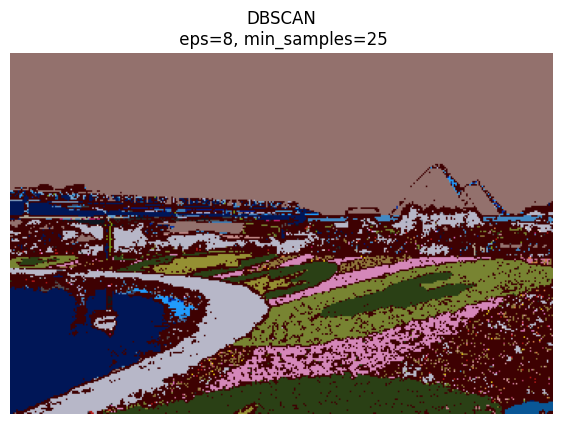

In [377]:
# посмотрим на нашу картинку
title = 'DBSCAN\n eps={}, min_samples={}'.format(eps, min_samples)
draw_picture(output_image, title, bgr=True)

In [378]:
color_space_1 = []
for ele in np.unique(target):
    color_space_1.append(df[df['clusters'] == ele].iloc[0].tolist()[:3])

color_space_1 = np.asarray(color_space_1)
color_space_1[:5]

array([[237, 167,  34],
       [255,  92,   0],
       [223, 168,  78],
       [214, 176, 128],
       [ 89,  26,   1]])

In [379]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space_1.astype('uint8')[target],
                          (img.shape[0], img.shape[1], 3)
                         )

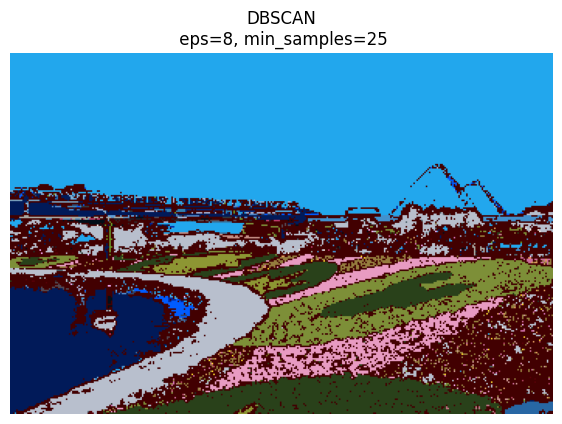

In [380]:
# посмотрим на нашу картинку
title = 'DBSCAN\n eps={}, min_samples={}'.format(eps, min_samples)
draw_picture(output_image, title, bgr=True)

c) AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20.

In [381]:
from sklearn.cluster import AgglomerativeClustering

k=2

In [382]:
# построим модель
clustering = AgglomerativeClustering(n_clusters=2)

In [383]:
# обучим модель
#clustering.fit(reshaped_img)
#clustering

In [384]:
# получим кластеры
#labels = clustering.labels_
#labels